# Assignment 4: 
Author: Theodore Janson - 260868223 <br>
Course: ECSE 415 <br>
Date: November 23rd, 2020

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/ECSE 415/Assignments/Assignment4/'



Mounted at /content/drive


##1 Image Segmentation using K-means

Approximately 10 seconds per iteration 

Segmentation of Home image with K = 2 

Centroid on iteration 1: {1: [195.9999162291969, 190.07768345805874, 154.4114263375405], 2: [68.35566805144407, 109.13032040598024, 138.30559217890993]}
Centroid on iteration 2: {1: [186.68481659550147, 178.12811417812594, 139.82348787950107], 2: [50.35905252257114, 100.33876402036142, 141.85344437799915]}
Centroid on iteration 3: {1: [180.82102467699102, 173.01047354757856, 136.33400471458836], 2: [45.45968575882453, 98.45951598215801, 143.77648901853652]}
Centroid on iteration 4: {1: [178.63209592877146, 171.16289222373806, 135.25948158253752], 2: [43.878785253557844, 97.9409244485048, 144.51870870185]}
Centroid on iteration 5: {1: [177.86346879165131, 170.53448373649434, 134.9350026940419], 2: [43.35645056391872, 97.77498770641328, 144.7656445805111]}
Centroid on iteration 6: {1: [177.58357796093486, 170.28004685559443, 134.7489556283166], 2: [43.161182327120045, 97.72741586614924, 144.89627202748267]}


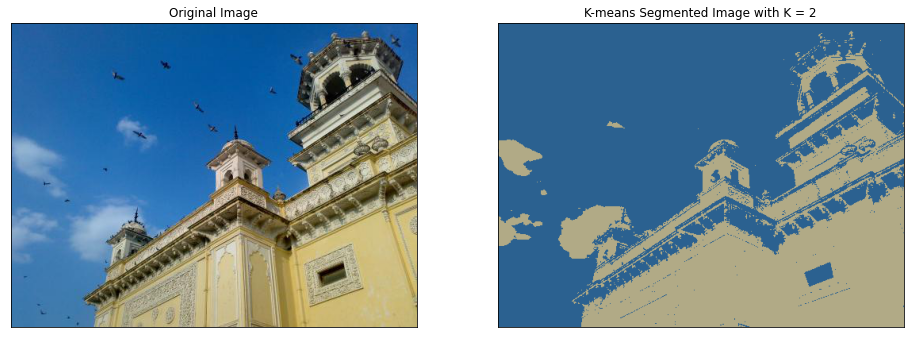

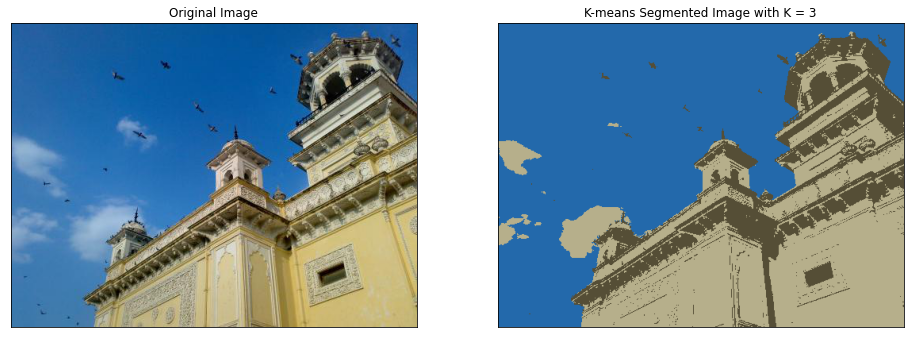

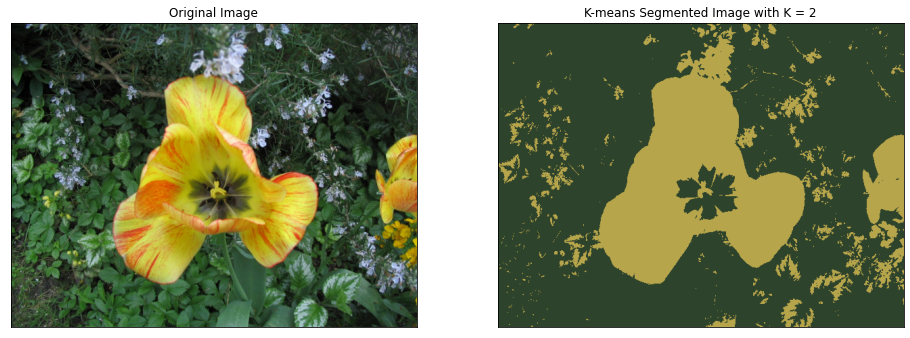

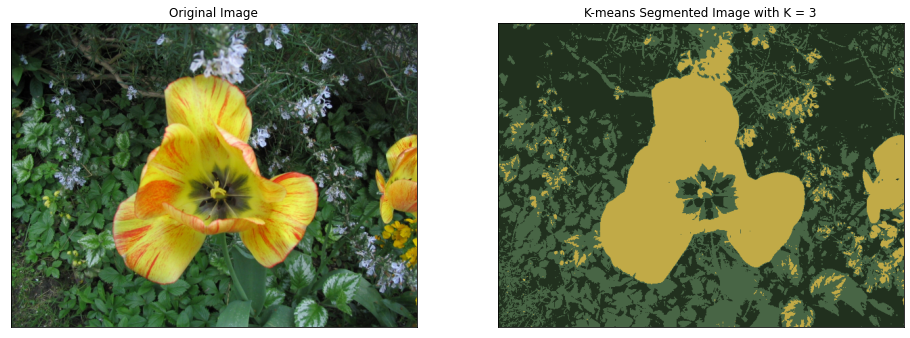

In [ ]:
def initialization(K): 
  '''
  Initializes K cluster centers at random values [0,255]
  Cluster centers are parametrized my 3 RGB values
  Parameters:
  -----------
  K : number of cluster centers
  Returns: 
  -----------
  Dictionary of K cluster centers
  '''
  centroids = {
      i+1: [np.random.randint(0, 255), np.random.randint(0, 255),  np.random.randint(0, 255)]
      for i in range(K)
  }
  return centroids

def assignment(centroids, K, img):
  '''
  Assigns every pixel value to a cluster based on Euclidean Distance
  Parameters: 
  ----------
  centroids: dictionary with Kth centroids as keys and their locations as values. 
  K: number of clusters centers
  img: column vectorized numpy array containing pixel values 
  Returns: 
  ---------
  A dictionary of clusters. Each Kth cluster center key is associated with a list 
  of pixels associated to it. 
  '''
  clusters = {i+1: [] for i in range(K)} #Initilize dictionary of clusters with empty list for associated points
  for j in range(img.shape[0]): #Iterate through column vector of image pixels
    distances = np.array([])    #Initialize an empty list of Euclidean distances
    for k in centroids.keys(): 
      #Iterate over the centroids: for each pixel, calculate the distance to each centroid and append to list
      #Of distances 
      sq_diff1 = (img[j][0] - centroids[k][0])**2
      sq_diff2 = (img[j][1] - centroids[k][1])**2
      sq_diff3 = (img[j][2] - centroids[k][2])**2
      dist = np.sqrt(sq_diff1 + sq_diff2 + sq_diff3)
      distances = np.append(distances,dist)
    #The closest cluster center can be retrieved from the index of the minimum distance. 
    center = np.argmin(distances)+1
    #For this cluster dictionary key (Kth center), append the pixel to its list of associated pixels. 
    #The pixel is represented by its index in the column vectorized image. 
    clusters[center].append(j)
  return clusters

def new_centroid(clusters, K, img):
  '''
  Compute new centroid values for each cluster (mean pixel for each cluster)
  Parameters: 
  ----------
  clusters: Dictionary of K cluster center keys and associated pixel values. 
  K: number of clusters centers
  img: column vectorized numpy array containing pixel values 
  Returns: 
  ---------
  centroids: dictionary with Kth centroids as keys and their locations as values. 
  '''
  #Initialization of centroid locations
  centroids = { i+1: [] for i in range(K) }
  #Iterate through each centroid
  for k in clusters.keys():
    points = []
    #Create a new list: 3 columns corresponding to the R,G,B values for each pixel in a cluster
    for i in clusters[k]:
      points.append(img[i])
    points = np.array(points)
    #Calculate the mean of each column and relocate the centroid to that point. 
    centroids[k] = [np.mean(points[:,0]),np.mean(points[:,1]),np.mean(points[:,2])]
  return centroids


def segment(centroids, clusters, img, ref):
  '''
  Segment the orignal image by replacing each pixel RGB values with its cluster center RGB values.
  ----------
  centroids: dictionary with Kth centroids as keys and their locations as values. 
  clusters: Dictionary of K cluster center keys and associated pixel values. 
  img: column vectorized numpy array containing pixel values 
  ref: orginal image
  '''
  #Iterate through the centroids
  for k in clusters.keys():
    #Iterate through the pixels in each cluster
      for j in clusters[k]:
        #Change the RGB values of each pixel to its associated cluster center RGB values. 
        img[j] = centroids[k]
  #Reshape our column vector back into the original image shape. 
  img = np.reshape(img, ref.shape)
  #Print the segmented and original images
  fig = plt.figure(figsize=(16,20))
  plt.subplot(121), plt.imshow(ref)
  plt.title('Original Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(img)
  plt.title('K-means Segmented Image with K = {}'.format(len(centroids.keys())))
  plt.xticks([]), plt.yticks([])
  plt.imshow(img)

def k_means_segmentation(image, K, iterations):
  '''
  Starting point of K-means segmentation algorithm. Calls all necessary functions to
  calculate cluster centers and clusters. 
  ----------
  image: image to segment
  K: number of cluster centers, or segmentations
  iterations: number of iterations for which to recompute cluster centers. 
  '''
  #Reshape image into column vector of pixels
  ref = image.copy()
  img = image.reshape((-1,3))
  #Initialize centroids 
  centroid = initialization(K)
  #Over i iterations, compute clusters and associated centroids. 
  for i in range(iterations):
    cluster = assignment(centroid, K, img)
    centroid = new_centroid(cluster, K, img)
    print('Centroid on iteration {}: {}'.format(i+1,centroid))
  print('\n')
  #Segment the  image using the final centroid values. 
  segment(centroid, cluster, img, ref)

print('Approximately 10 seconds per iteration \n')

#Segment Flower and Home images using K-means Segmentation with K=2 and K=3

print('Segmentation of Home image with K = 2 \n')
home = plt.imread(path+'home.jpg')
k_means_segmentation(home.copy(), 2, 10)

print('Segmentation of Home image with K = 3 \n')
home = plt.imread(path+'home.jpg')
k_means_segmentation(home.copy(), 3, 10)

print('Segmentation of Flower image with K = 2 \n')
home = plt.imread(path+'flower.jpg')
k_means_segmentation(home.copy(), 2, 10)

print('Segmentation of Flower image with K = 3 \n')
home = plt.imread(path+'flower.jpg')
k_means_segmentation(home.copy(), 3, 10)





## 2 Disparity


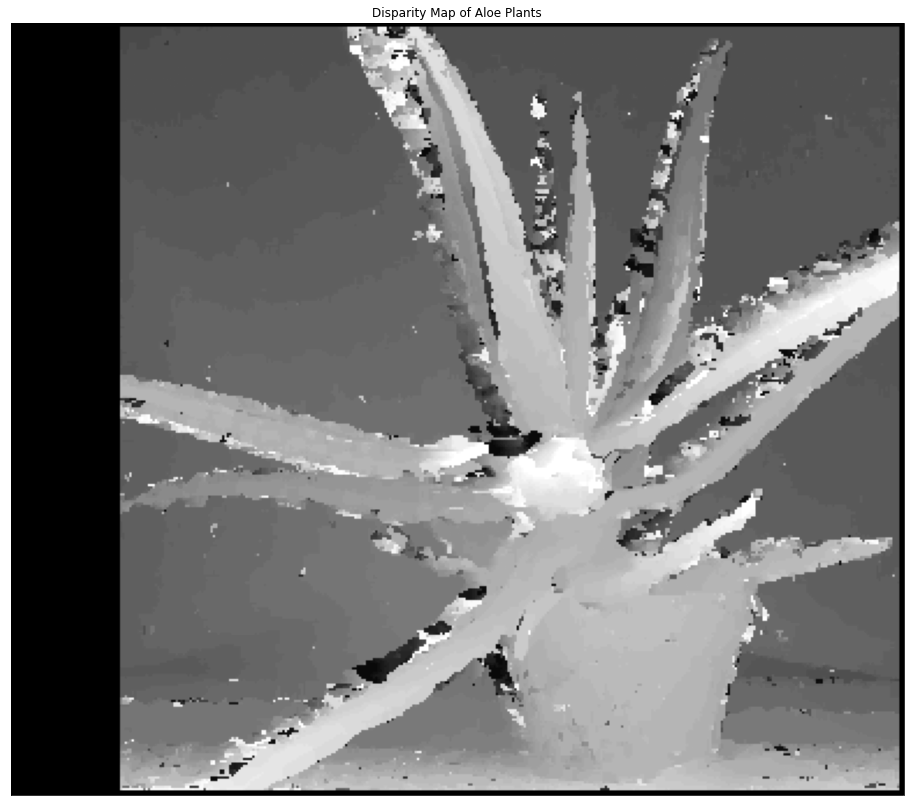

In [ ]:


# load left and right images
imgL = cv2.imread(path+"aloeL.jpg")
imgR = cv2.imread(path+"aloeR.jpg")
#Convert to grayscale
imgL = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
imgR = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)
#Resize left and right images. 
imgL = cv2.resize(imgL, None, fx=0.3, fy=0.3)
imgR = cv2.resize(imgR, None, fx=0.3, fy=0.3)

#Get shape of image
H,W = imgL.shape

window_size = 5
px_border = 2
#Initialize matrix of windows, matrix with 1st 2 dimensions same as image. Each element in this matrix is a 5x5
#neighbourhood matrix of pixels associated with a center pixel from the image. 
reference_windowsL = np.zeros((H, W, window_size, window_size))
reference_windowsR = np.zeros((H, W, window_size, window_size))
#Border pixels will have a neighbourhood value of 0. 
#Iterate through the pixels in each image, excluding the two border pixels (border pixels do not have a 5x5 
#neighbourhood of pixels)
for y in range(px_border, H - px_border):
  for x in range(px_border, W - px_border):
    #compute 5x5 window
    windowL = imgL[y-px_border:y+px_border+1, x-px_border:x+px_border+1]
    windowR = imgR[y-px_border:y+px_border+1, x-px_border:x+px_border+1]
    #Add to matrix of windows 
    reference_windowsL[y,x] = windowL
    reference_windowsR[y,x] = windowR

#Initialize a matrix of search zones: the 1st two dimensions correspond to the left image dimensions. Each
#element in that array has a corresponding scanline matrix determined fro the right image. 
#This scanline starts at the same (y,x) value 
#and extends to (y,x-47). So the scanline has shape (1,47), The elements in this scanline are 5x5 matrices of 
#pixel neighbourhoods obtained fom right image (see above)
# So search zone shape = (IMG[0], IMG[1], 1, 47, 5, 5)
scan_dim = (1,47)
search_regions = np.zeros((H,W,scan_dim[0],scan_dim[1],window_size,window_size))
#Iterate through image, excluding first 47 columns of pixels as they dont have full scanlines. 
for y in range(px_border,H-px_border):
  for x in range(scan_dim[1],W-px_border):
    #Build search_regions for each pixel (1x47 with each element being 5x5 matrix)
    #using reference window matrix
    search_regions[y,x] = reference_windowsR[y:y+1,x-scan_dim[1]:x]

#initialize disparity map
disparity = np.full_like(imgL, 48)
#iterate throough each image
for y in range(px_border,H-px_border):
  for x in range(scan_dim[1],W-px_border):
    #for each pixel neighbourhood in the left image, compute the SSD 
    #with each pixel neighbourhood in the corresponding right image search zone
    differences = []
    for a in search_regions[y,x,0]:
      SSD = np.sum((a[:,:] - reference_windowsL[y,x][:,:]) **2) 
      differences.append(SSD)
    #pick the index of the lowest SSD
    index = np.argmin(np.array(differences))
    #which corresponds to the disparity: D(i, j) = jL − j R. (Note that 0 ≤ D(i, j) ≤ 47)
    disparity[y,x] = index

fig = plt.figure(figsize=(16,20))
plt.subplot(111), plt.imshow(disparity, cmap = 'gray_r')
plt.title('Disparity Map of Aloe Plants'), plt.xticks([]), plt.yticks([])
plt.show()

    

##3 Optical Flow

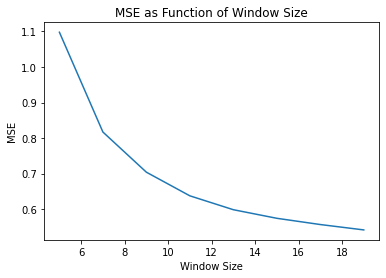

In [ ]:
gt = np.load(path+'flow10.npz')['flow']
img1 = cv2.imread(path+"frame10.png")
img2 = cv2.imread(path+"frame11.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

MSE,window_size = [],[]

for w in range(5,21):
  if (w %2 != 0):
    flow = cv2.calcOpticalFlowFarneback(prev=img1, 
                                        next=img2, 
                                        flow=None,
                                        pyr_scale=0.5, 
                                        levels=3, 
                                        winsize=w,
                                        iterations=3, 
                                        poly_n=5, 
                                        poly_sigma=1.2, 
                                        flags=0)
    mse = (np.square(gt - flow)).mean(axis=None)
    window_size.append(w)
    MSE.append(mse)

plt.subplot(111)
plt.plot(window_size, MSE)
plt.xlabel("Window Size"), plt.ylabel("MSE")
plt.title('MSE as Function of Window Size')
plt.show()
  

*Do you observe any trend in the plot above? Does the error increase or decrease with increasing window-size? Explain the effect of window-size on the prediction error.*

Mean squared error decreases inversely to window size, and approaches 0. 